# ATHENS WEATHER ANALYSIS REPORT
### Assignment I - Analytics Practicum I

> Professor: Panos Louridas. <br />
> Student: Skoli Maria <br />
> AM: p2822131

In this assignment we will explore the weather in Athens for the period 1955-2020. 
For this analysis we used the data downloaded from the National Oceanic and Atmospheric Administration's National Centers for Environmental Information (main_dataset). However, this dataset contains missing data and therefore we used an extra dataset from Hellenic services which cover the period from 2010-2019 (support_dataset). 

The aim of this assignment is to examine and visualize the following. First we will examine the deviation of Summer Temperatures. Then we will see the evolution of daily temperatures among years. Afterwards, we will examine the extreme temperature events among the period 1955-2020. At the end, we will examine the volume of precipitation over years.


# 1. Obtain the Data

In [1]:
#First we import the essential libraries for this project

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt

import matplotlib

from collections import defaultdict

%matplotlib inline

matplotlib.style.use('ggplot')

pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
#Import the main dataset and the support dataset to fill the values with NAs

main_dataset="./MyData.csv"
support_dataset="./athens.csv"

Below we can see a small view of our data. We can assume that the Temperatures are in Celsius. 

In [3]:
#Reading the first dataset 
Data=pd.read_csv(main_dataset)
#Some descriptives 
Data.describe()

,PRCP,TAVG
count,22773.000000,20940.000000
mean,1.011316,18.273873
std,4.633756,6.926203
min,0.000000,-2.000000
25%,0.000000,12.700000
50%,0.000000,17.700000
75%,0.000000,24.300000
max,142.000000,34.800000


In [4]:
#Reading the extra dataset
Extra=pd.read_csv(support_dataset)
Extra


,DATE,TAVG,TMAX,TMIN,HAVG,HMAX,HMIN,PAVG,PMAX,PMIN,DAILY RAINFALL,WMEAN,WDIRECTION,WGUST,Unnamed: 14,Unnamed: 15
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7,NaN,NaN
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7,NaN,NaN
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4,NaN,NaN
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0,NaN,NaN
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,10.1,10.2,10,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0,NaN,NaN
3648,2019-12-28,8.3,8.4,8.2,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8,NaN,NaN
3649,2019-12-29,6.4,6.5,6.4,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5,NaN,NaN
3650,2019-12-30,4,4,3.9,83.9,90,65,1020.0,1024.2,1016.6,12.4,5.1,NE,15.0,NaN,NaN


In [5]:
Extra.dtypes

DATE               object
TAVG               object
TMAX               object
TMIN               object
HAVG              float64
HMAX                int64
HMIN                int64
PAVG              float64
PMAX              float64
PMIN              float64
DAILY RAINFALL    float64
WMEAN             float64
WDIRECTION         object
WGUST             float64
Unnamed: 14       float64
Unnamed: 15       float64
dtype: object

Some of the variables of interest in the extra dataset are objects, like the TAVG variable. So, we will convert the data type into numeric and the date as datetime. 

In [6]:
#Converting Date to datetype
Extra["DATE"]=pd.to_datetime(Extra["DATE"])

#Converting TAVG to numeric
Extra["TAVG"]=pd.to_numeric(Extra["TAVG"],  errors= 'coerce')


Now we can have a clear view of our data. We can assume that the Temperature in this dataset is also in Celsious.

In [7]:
Extra.describe()

,TAVG,HAVG,HMAX,HMIN,PAVG,PMAX,PMIN,DAILY RAINFALL,WMEAN,WGUST,Unnamed: 14,Unnamed: 15
count,3649.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,0.0,1.000000
mean,19.443245,60.689923,75.160186,45.710022,1015.309173,1017.351232,1013.219962,1.255531,4.609693,11.955148,NaN,19.630495
std,7.143639,12.752247,12.016278,13.018642,6.104613,5.996034,6.391040,4.993957,3.227490,6.311313,NaN,NaN
min,0.800000,26.300000,38.000000,13.000000,992.300000,999.400000,983.400000,0.000000,0.200000,2.000000,NaN,19.630495
25%,13.700000,50.675000,67.000000,36.000000,1011.300000,1013.100000,1009.300000,0.000000,2.300000,7.500000,NaN,19.630495
50%,18.900000,61.300000,77.000000,45.000000,1014.600000,1016.500000,1012.700000,0.000000,3.600000,10.300000,NaN,19.630495
75%,25.800000,70.700000,85.000000,55.000000,1019.200000,1021.200000,1017.100000,0.000000,6.100000,15.100000,NaN,19.630495
max,35.300000,90.100000,96.000000,85.000000,1037.100000,1039.400000,1036.300000,97.000000,23.200000,46.300000,NaN,19.630495


We do not need all the information from the second dataset and therefore, we will keep only the variables in need.

In [8]:
#We selected a subset of the Extra dataset to fill the missing values 
FillData=Extra[["DATE","TAVG","DAILY RAINFALL"]]
FillData=FillData.sort_values(by=['DATE'])


We also checked the data types of the main dataset and we applied the necessary modifications.

In [9]:
Data.dtypes

STATION     object
NAME        object
DATE        object
PRCP       float64
TAVG       float64
dtype: object

In [10]:
#Convert Date into Datetime
Data["DATE"]=pd.to_datetime(Data["DATE"])
Data.dtypes

STATION            object
NAME               object
DATE       datetime64[ns]
PRCP              float64
TAVG              float64
dtype: object

In order to ameliorate the absence of several values in the main dataset we merged the two datasets. Afterwards, we filled the missing values in the columns PRCP and TAVG_x of the first dataset with the respectively values of the DAILY RAINFALL and TAVG_y of the second dataset.

The merged Dataset is presented below. We used an outer join in order to fill the missing values in the "Data" dataset with the corresponding values of "FillData" dataset.The merged dataset will contain also observations of dates that were missing in the original dataset.

In [11]:
#Creating the merged dataset
MergedDf= Data.merge(FillData, how="outer",left_on="DATE", right_on="DATE").sort_values(by="DATE")

#Print the Merged Dataframe
MergedDf

,STATION,NAME,DATE,PRCP,TAVG_x,TAVG_y,DAILY RAINFALL
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.0,NaN,NaN,NaN
1,GR000016716,"HELLINIKON, GR",1955-01-02,2.0,NaN,NaN,NaN
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.0,NaN,NaN,NaN
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.0,NaN,NaN,NaN
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
23246,GR000016716,"HELLINIKON, GR",2020-12-27,0.0,16.6,NaN,NaN
23247,GR000016716,"HELLINIKON, GR",2020-12-28,6.6,14.8,NaN,NaN
23248,GR000016716,"HELLINIKON, GR",2020-12-29,0.0,16.3,NaN,NaN
23249,GR000016716,"HELLINIKON, GR",2020-12-30,0.0,16.4,NaN,NaN


We fill the missing values of the sector PRCP of the first dataset with the values of Daily rainfall of the second dataset. We fill the missing values of the sector TAVG of the first dataset with the values of TAVG of the second dataset

In [12]:
#Filling the missing values for variables PRCP and TAVG_x

MergedDf["PRCP"].fillna(MergedDf["DAILY RAINFALL"], inplace=True)

MergedDf["TAVG_x"].fillna(MergedDf["TAVG_y"], inplace=True)

Now we can see that the missing values were eliminated. If we wanted to fill all NAs we could use the method of backward filling (bfill) or interpolation.

In [13]:
#Another way to fill the remaining NAs
#MergedDf["PRCP"]=MergedDf["PRCP"].fillna(method="bfill")
#MergedDf["TAVG_x"]=MergedDf["TAVG_x"].fillna(method="bfill")

In [14]:
MergedDf.isna().sum()

STATION             853
NAME                853
DATE                  0
PRCP                376
TAVG_x             2312
TAVG_y            20455
DAILY RAINFALL    20452
dtype: int64

After implementing all the above we conclude to the following Dataset.

In [15]:
#We took a subset of the Merged Dataset 
FinalDF=MergedDf[["DATE","PRCP","TAVG_x"]]
FinalDF=FinalDF.sort_values(by=['DATE'])

#Renaming the TAVG_x into TAVG
FinalDF=FinalDF.rename(columns={"TAVG_x":"TAVG"})

#Printing the Final Dataset
FinalDF

,DATE,PRCP,TAVG
0,1955-01-01,0.0,NaN
1,1955-01-02,2.0,NaN
2,1955-01-03,0.0,NaN
3,1955-01-04,0.0,NaN
4,1955-01-05,0.0,NaN
...,...,...,...
23246,2020-12-27,0.0,16.6
23247,2020-12-28,6.6,14.8
23248,2020-12-29,0.0,16.3
23249,2020-12-30,0.0,16.4


# 2. Deviation of Summer Temperatures

## 2.1 Data Preparation

In this sector we are going to visualize the mean summer temperature deviation from a baseline of 1974-1999. We will first create a dataset containing only the summer period (June, July, August).  

In [16]:
#Creating a Dataset with only summer period
Summer_DF=FinalDF[FinalDF.DATE.dt.month.isin([6,7,8])]
Summer_DF

,DATE,PRCP,TAVG
151,1955-06-01,0.0,NaN
152,1955-06-02,0.0,NaN
153,1955-06-03,0.0,NaN
154,1955-06-04,0.0,NaN
155,1955-06-05,0.0,NaN
...,...,...,...
23124,2020-08-27,0.0,28.3
23125,2020-08-28,0.0,29.5
23126,2020-08-29,0.0,29.3
23127,2020-08-30,0.0,27.8


Then, we will calculate the average summer temperature for each year.   

In [17]:
#Calculating the average summer temperature per year
MO=Summer_DF.groupby(Summer_DF.DATE.dt.year).mean()['TAVG']
MO



DATE
1955          NaN
1956          NaN
1957    28.091935
1958    27.081522
1959          NaN
          ...    
2016    28.154348
2017    28.088043
2018    27.436957
2019    28.034783
2020    27.380435
Name: TAVG, Length: 66, dtype: float64

Afterwards, the average temperature for the years 1974-1999 will be calculated in order to be used as a baseline for our analysis. 

In [18]:
#Creating a list which contains the years 1974-1999
lista74_99=list(range(1974,2000))

#Calculates the average temperature for the period 1974-1999
avg1974_1999=Summer_DF[Summer_DF.DATE.dt.year.isin(lista74_99)]['TAVG'].mean()
avg1974_1999


26.232145850796297

The next step is to calculate the deviations of each years' temperature from the baseline. 

In [19]:
#Calculates the differences from the baseline 1974-1999
diff=MO-avg1974_1999
diff 

DATE
1955         NaN
1956         NaN
1957    1.859790
1958    0.849376
1959         NaN
          ...   
2016    1.922202
2017    1.855898
2018    1.204811
2019    1.802637
2020    1.148289
Name: TAVG, Length: 66, dtype: float64

For the purposes of this analysis we calculated the 10 years rolling average of the deviation from the mean. 

In [20]:
#Calculates the 10 year rolling average
x=diff.rolling(10,min_periods=1).mean()
x

DATE
1955         NaN
1956         NaN
1957    1.859790
1958    1.354583
1959    1.354583
          ...   
2016    1.953902
2017    1.936332
2018    1.863180
2019    1.927963
2020    1.869811
Name: TAVG, Length: 66, dtype: float64

In [21]:
#Creating a list of colors based on the value of diff in order to insert it in the graph below
color = []

for i in diff:
    if i>=0:
        color.append("orange")
    else:
        color.append("blue")
        
print(color)

['blue', 'blue', 'orange', 'orange', 'blue', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'orange', 'blue', 'blue', 'orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'orange', 'blue', 'orange', 'blue', 'orange', 'blue', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']


## 2.2 Creating the Plot

Text(0.5, 1.0, 'Mean Summer Temperature Difference from the 1974-1999 Mean')

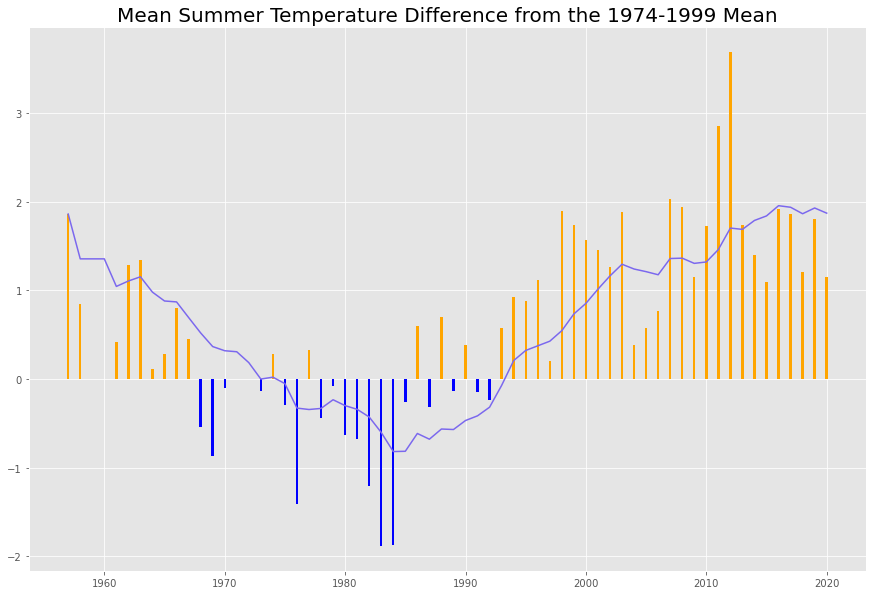

In [22]:
#Setting the size of the plot 
fig, ax=plt.subplots(figsize=(15,10))

#Setting the number of the bars 
lista55_20=list(range(1955,2020))
categories=lista55_20

#Creating the a bar for each year
ax.bar(diff.index,diff,width=0.2,color=color)

#Adds the blue line with the 10 year rolling average 
ax.plot(x.index,x,color='mediumslateblue')

#Sets a tittle 
ax.set_title('Mean Summer Temperature Difference from the 1974-1999 Mean',color="black",size=20)


## 2.3 Interpretation of the graph

From the above graph it is noticeable that the summer mean temperature remained relative low during the period 1968-1992, and then started to rise and reached a local peak in 2011-2012 which were the warmest summers on record. Moreover, we can see that after 1998 the mean temperature remained almost stable at 2 degrees Celcius higher than the mean temperature of the 1974-1999 period. This can be an effect of the global warming phenomenon. 

# 3. Evolution of Daily Temperatures

In this section we examine the average daily temperature for the period 1955 to 2020. We will create a different line for each year in order to be clear the evolution of the temperature over years. For this reason the lines will be colored from light orange to dark orange, progressing through the years in ascending order. Finally, we will compare the temperatures with the average daily temperature for the baseline period of 1974-1999.

## 3.1 Data Preparation

In [23]:
#Calculates the average temperature per year
Temp_year=FinalDF.groupby(FinalDF.DATE.dt.year).mean()['TAVG']
Temp_year

DATE
1955          NaN
1956          NaN
1957    21.271739
1958    18.710959
1959          NaN
          ...    
2016    19.372131
2017    19.181370
2018    19.512055
2019    19.219726
2020    19.314208
Name: TAVG, Length: 66, dtype: float64

In [24]:
#Creating the Baseline for the graph
line=FinalDF[FinalDF.DATE.dt.year.isin(lista74_99)]
baseline=line.groupby(line.DATE.dt.day_of_year).TAVG.mean()

## 3.2 Creating the Graph

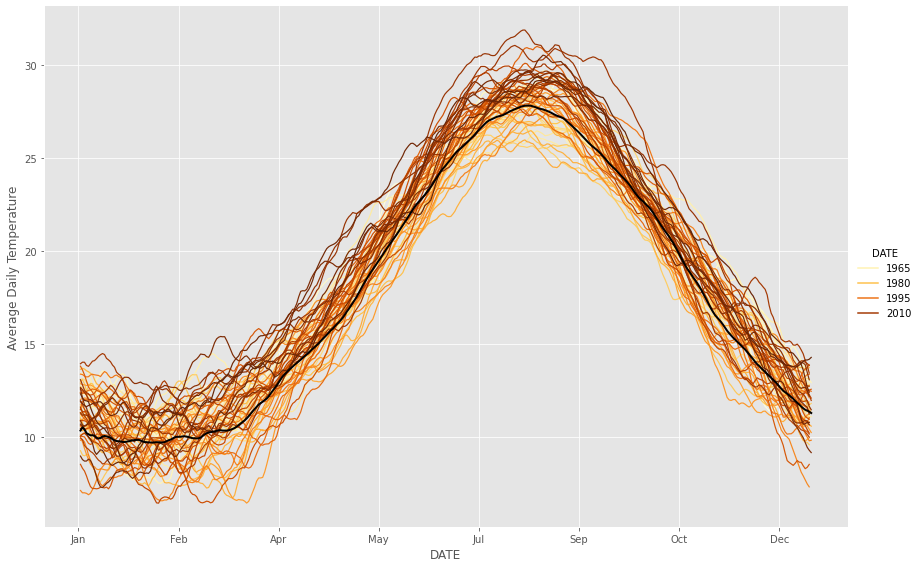

In [25]:

import matplotlib.dates as mdates

#Inserts a palette with orange colors
palette=sns.color_palette("YlOrBr", as_cmap=True)

#Creating the graph 
gf=sns.relplot(x=FinalDF.DATE.dt.dayofyear, y=FinalDF.TAVG.rolling(30).mean(), hue=FinalDF.DATE.dt.year,
            kind="line", height=8, aspect=1.5,linewidth=1.2, palette=palette, data=FinalDF)

#Formats the x-axis ticks 
fmt = mdates.DateFormatter("%b")
gf.ax.xaxis.set_major_formatter(fmt)

#Sets the axis labels
gf.set(xlabel ="DATE", ylabel="Average Daily Temperature")

#Draws the baseline 
plt.plot(baseline.rolling(30, min_periods=1).mean(), color ='black',linewidth = 2)



## 3.3 Interpretation of the Graph

From the above graph we gained insight about the average daily temperatures for each season. Specifically, during winter the average daily temperature is below 15 degrees of Celsius and during spring the average daily temperature can reach 20 degrees Celsius. In the summer and especially during August the daily temperature can reach 30 degrees Celsius. It also noticable that during the last years the local peak is higher than 30 degrees. In conjunction with the previous chart we can assume that the two lines that exceed 30 degrees during August should be 2011 and 1012. Finally, during autumn the daily temperature is lower than 25 degrees Celsius and higher than 15 degrees. 

Another observation we should note here is that the most recent years are above the baseline of the average temperature of 1974-1999. This is an important indicator that nowadays there is an alarming increase in temperatures during all seasons. 


# 4. Extreme Temperature Events

In this section, we examine the extreme temperature events over the years. As an extreme temperature can be deemed a temperature 10% higher than the expected value. Below we will count the number of extreme events per year consider the extreme events of 1974-1999 as a baseline. At the end, we will visualize at which years the percentage of the extreme heat events exceed the baseline.  

## 4.1 Data Preparation

The first step is to count the number of observations for each year. This will help us calculate the percentage of extreme events based on the existing observations. That is happening because we do not have data for all the days of a year. 

In [26]:
#Counts the number of observations for each year 
obs=FinalDF.groupby(FinalDF.DATE.dt.year).count()
obs
obs.TAVG


DATE
1955      0
1956      0
1957    184
1958    365
1959      0
       ... 
2016    366
2017    365
2018    365
2019    365
2020    366
Name: TAVG, Length: 66, dtype: int64

We create a copy of the Final Dataframe in order to avoid problems.

In [27]:
#Creating a copy of the Final Dataframe
New=FinalDF.copy()
New

,DATE,PRCP,TAVG
0,1955-01-01,0.0,NaN
1,1955-01-02,2.0,NaN
2,1955-01-03,0.0,NaN
3,1955-01-04,0.0,NaN
4,1955-01-05,0.0,NaN
...,...,...,...
23246,2020-12-27,0.0,16.6
23247,2020-12-28,6.6,14.8
23248,2020-12-29,0.0,16.3
23249,2020-12-30,0.0,16.4


In order to difine the extreme heat events we need to set a baseline to compare the temperatures with. We will set this baseline as the average temperature of each day of the year that was calculated only for the period 1974-1999. Then we will examine if the daily temperature exceeds the baseline temperature of the respective day of the year beyond 10%. 

In [28]:
#Creating a subset of the Final dataframe containing only the observations of the period 1974-1999.
DF74_99=FinalDF[New.DATE.dt.year.isin(lista74_99)]

#Calculating the average temperature of each day of the year and for the period 1974-1999
base=DF74_99.groupby(DF74_99.DATE.dt.dayofyear).TAVG.mean()
base

DATE
1      10.365385
2      10.707692
3      10.207692
4       9.634615
5       9.919231
         ...    
362    10.261538
363    10.653846
364    11.011538
365    11.146154
366     9.833333
Name: TAVG, Length: 366, dtype: float64

We create a new column in the dataframe which declares the day of the year that corresponds to each observation. 

In [29]:
#Inserting a new column for the day of the year 
New['day_index'] = New.DATE.dt.dayofyear
New

,DATE,PRCP,TAVG,day_index
0,1955-01-01,0.0,NaN,1
1,1955-01-02,2.0,NaN,2
2,1955-01-03,0.0,NaN,3
3,1955-01-04,0.0,NaN,4
4,1955-01-05,0.0,NaN,5
...,...,...,...,...
23246,2020-12-27,0.0,16.6,362
23247,2020-12-28,6.6,14.8,363
23248,2020-12-29,0.0,16.3,364
23249,2020-12-30,0.0,16.4,365


We merged the previous dataframe with the dataframe "base" which indicates the baseline temperature to make the comparison between the daily temperature and the baseline easier. The join conducted on the day of the year index. It is also needed to rename the columns. 

In [30]:
#Merges the dataframes New and Base on the day of year index
ExtremeEvents= New.merge(base, left_on='day_index', right_on=base.index)

#Renaming the columns
ExtremeEvents=ExtremeEvents.rename(columns={"TAVG_x":"TAVG", "TAVG_y":"TAVG_BASE"})
ExtremeEvents

,DATE,PRCP,TAVG,day_index,TAVG_BASE
0,1955-01-01,0.0,NaN,1,10.365385
1,1956-01-01,0.0,NaN,1,10.365385
2,1957-01-01,0.0,NaN,1,10.365385
3,1958-01-01,0.0,12.1,1,10.365385
4,1959-01-01,0.0,NaN,1,10.365385
...,...,...,...,...,...
24099,2004-12-31,9.4,9.9,366,9.833333
24100,2008-12-31,0.0,6.0,366,9.833333
24101,2012-12-31,27.9,10.7,366,9.833333
24102,2016-12-31,0.0,3.4,366,9.833333


Then, we count how many daily temperatures exceed the base temperature beyond 10% for each year. 

In [31]:
#Counts the extreme events of each year
ExtremeTemp=ExtremeEvents[ExtremeEvents.TAVG > ExtremeEvents.TAVG_BASE*1.1].groupby(ExtremeEvents.DATE.dt.year).count()['TAVG']
ExtremeTemp

DATE
1957     50
1958    134
1961    136
1962    154
1963    142
       ... 
2016    158
2017    169
2018    168
2019    159
2020    174
Name: TAVG, Length: 61, dtype: int64

Afterwards, we calculate the percentages of the extreme events for each year in the period 1955-2020.

In [32]:
#Calculates the Percentages of extreme heat events
Percentages=ExtremeTemp/obs.TAVG
Percentages

DATE
1955         NaN
1956         NaN
1957    0.271739
1958    0.367123
1959         NaN
          ...   
2016    0.431694
2017    0.463014
2018    0.460274
2019    0.435616
2020    0.475410
Name: TAVG, Length: 66, dtype: float64

Finally, we calculated the baseline percentage of extreme events as the average of the percentages of extreme events of the years 1974-1999.

In [33]:
#Calculates the average percentage of extreme events for the baseline period
Baseline74_99=Percentages[Percentages.index.isin(lista74_99)].mean()
Baseline74_99

0.2481314415207134

In [34]:
#Creating a list with colors in order to use them for the graph
color2 = []

for i in Percentages:
    if i>=Baseline74_99:
        color2.append("orange")
    else:
        color2.append("blue")
        

## 4.2 Creating the Graph

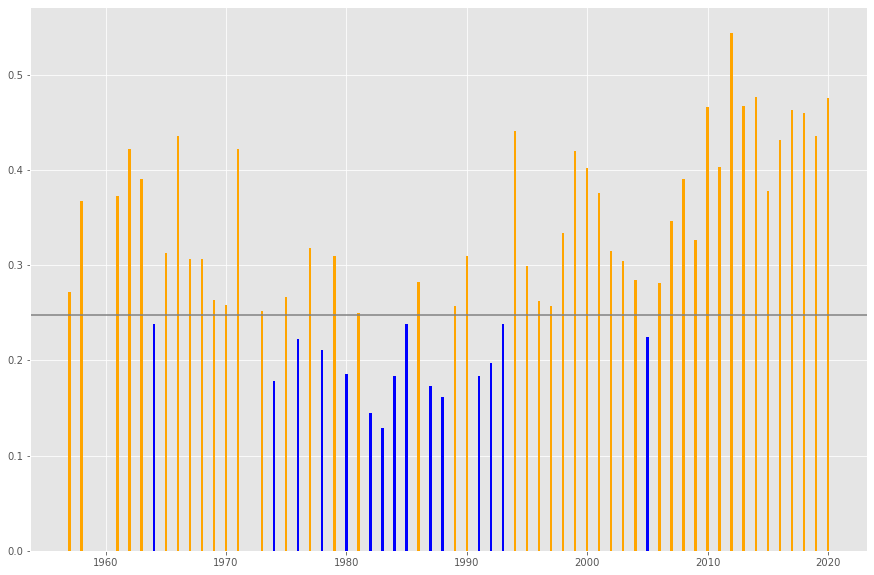

In [35]:
#Creating the plot and setting the size 
fig, ax=plt.subplots(figsize=(15,10))

#Setting the number of bars
lista55_20=list(range(1955,2020))
categories=lista55_20

#Filling the bars for each year
ax.bar(Percentages.index,Percentages,width=0.2,color=color2)

#Adding the Baseline 
ax.axhline(Baseline74_99,color='gray')

## 4.3 Interpretation of the Graph

From the above graph we can note an alarming increase in extreme heat events mainly after 1994. This can be an indicator for the effect of the global warming on the temperature in Greece. We can also observe that the period 1972-1993 the amount of extreme events is near or below the baseline. As we will see in the following chapter the sharp decrease in 2005 is due to the high amount of precipitation.  

#  5. Precipitation

In this section, we will examine the precipitation over the years. Precipitation is the process behind the condensation of water vapour in the atmosphere that falls down under the influence of gravity. For this reason we will calculate the ratio of rainfall over rainy days over years. 

## 5.1 Data Preparation

First, we will calculate the overall rainfall for each year. 

In [36]:
#Calculating the overall amount of rainfall per year
OverallRain = FinalDF.groupby(FinalDF.DATE.dt.year).sum()['PRCP']
OverallRain

DATE
1955    547.0
1956    281.3
1957    303.2
1958    350.0
1959    214.0
        ...  
2016    261.6
2017    304.3
2018    380.2
2019    570.0
2020    210.4
Name: PRCP, Length: 66, dtype: float64

Then, we will calculate the number of rainy days for each year. A rainy day can be considered a day with precipitation (PRCP) higher than zero. 

In [37]:
#Calculating the number of Rainy Days per year
RainyDays=FinalDF[FinalDF.PRCP > 0].groupby(FinalDF.DATE.dt.year).count()
RainyDays

,DATE,PRCP,TAVG
DATE,,,
1955,68,68,0
1956,52,52,0
1957,73,73,37
1958,68,68,68
1959,62,62,0
...,...,...,...
2016,42,42,42
2017,48,48,48
2018,55,55,55


In order to get an indication of whether we are getting rain in more concentrated bursts we calculated the ratio of the rainfall over rainy days over years.This ratio is calculated by dividing the rainfall by the number of rainy days. 

In [38]:
#Calculating the Rainfall ratio
RainRatio=OverallRain/RainyDays.PRCP
RainRatio

DATE
1955    8.044118
1956    5.409615
1957    4.153425
1958    5.147059
1959    3.451613
          ...   
2016    6.228571
2017    6.339583
2018    6.912727
2019    9.827586
2020    5.536842
Name: PRCP, Length: 66, dtype: float64

In order to smooth the graph below we calculated the rain ratio as a 10 years rolling average. For the years that we can not calculate 10 years before we used the convention of min periods = 1 so that an average of less than 10 years can be calculated for years 1955-1965. 

In [39]:
#Smoothing the Rain Ratio using the 10 year rolling average. 
#For years that we can not calculate 10 years before we used the convention of min periods =1 
Rratio=RainRatio.rolling(10,min_periods=1).mean()
Rratio

DATE
1955    8.044118
1956    6.726867
1957    5.869053
1958    5.688554
1959    5.241166
          ...   
2016    6.545994
2017    6.623414
2018    6.769177
2019    7.214330
2020    7.053591
Name: PRCP, Length: 66, dtype: float64

## 5.2 Creating the Graph

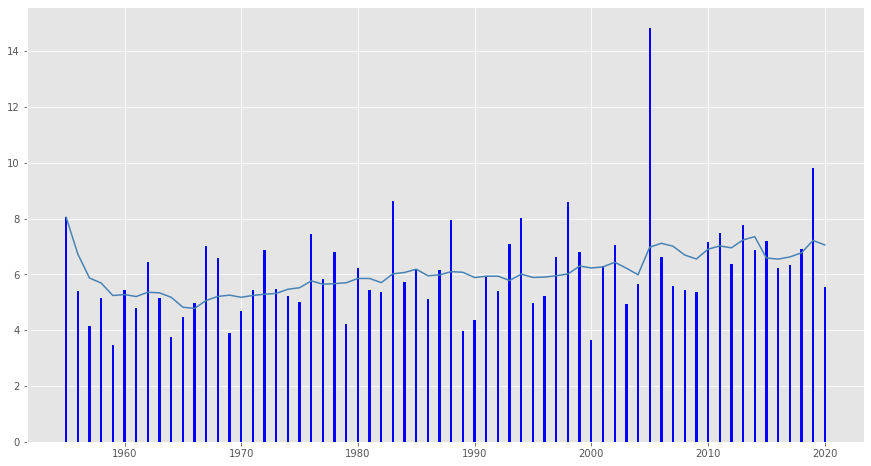

In [40]:
#Constructing the plot 

#Set the size of the figure
fig, ax=plt.subplots(figsize=(15,8))

#Constructing a list with the years of the baseline so that we can set them as categories
lista2=list(range(1955,2020))
categories=lista2

#Creating the bars and set the color as blue 
ax.bar(RainRatio.index,RainRatio,width=0.2,color='blue')

#Plotting the line of the ratio with a steelblue color 
ax.plot(Rratio.index,Rratio,color='steelblue')

## 5.3 Interpretation of the Graph

From the above graph we can gain some useful insight. First of all, looking at the 10 years rolling average rainfall ratio line, it is noticable that the precipitation has an increasing trend over years. 
From the above graph it is noticeable that the rainfall ratio remained relative steady and below the scale of 8 during the period 1955-2018, but it reached a local peak above the scale of 14 in 2005 which was the year with the most concentrated bursts on record. The second highest concentrated rainfall was observed in 2019. At the end, if we look back at the previous graphs of this report we can highlight that the temperatures during 2005 were extremely lower than the average temperatures of the rest period. Therefore, the low temperatures in the aforementioned year can be explained by the many precipitations.